This is a procedural script running through the steps for segmenting bee like features from an atomic force microscopy image. For more detail please read pdf provided

#Data Loading

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [3]:
imat = np.loadtxt('pmb 1 rtfot.txt',np.float32)
imat = np.absolute(imat)
imat = imat - imat.min()
imat = imat/imat.max()
cv2.imshow('afm',imat)
cv2.waitKey()
cv2.destroyAllWindows()

#Initiating and applying the wavlet\gabor filter ()

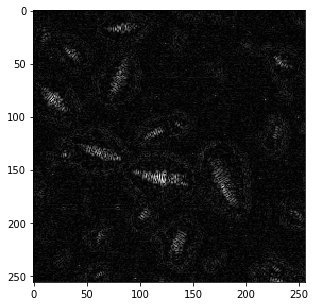

In [4]:
g_kernel1 = cv2.getGaborKernel((5, 5), 3.0, np.pi/4, 5.0, 7.0, 0, ktype=cv2.CV_32F)
g_kernel2 = cv2.getGaborKernel((5, 5), 3.0, 1.57, 5.0, 7.0, 0, ktype=cv2.CV_32F)
g_kernel3 = cv2.getGaborKernel((5, 5), 3.0, 0, 5.0, 7.0, 0, ktype=cv2.CV_32F)
g_kernel4 = cv2.getGaborKernel((5, 5), 3.0, 2.356, 5.0, 7.0, 0, ktype=cv2.CV_32F)
filtered_img1 = cv2.filter2D(imat, cv2.CV_32F, g_kernel1)
filtered_img2 = cv2.filter2D(imat, cv2.CV_32F, g_kernel2)
filtered_img3 = cv2.filter2D(imat, cv2.CV_32F, g_kernel3)
filtered_img4 = cv2.filter2D(imat, cv2.CV_32F, g_kernel4)
filtered_img = filtered_img1+filtered_img2+filtered_img3+filtered_img4
fig1 = plt.figure(figsize=(5,5))
plt.imshow(np.absolute(filtered_img),cmap='gray')

#Normalizing the z scale

In [5]:
from sklearn import preprocessing
features = np.zeros((65536,2))
for i in range(256):
    for j in range(256):
        features[i*256+j,0]=imat[i,j]
        #features[i*256+j,1]=score_smooth[i,j]
        features[i*256+j,1]=np.absolute(filtered_img)[i,j]
        
scaler = preprocessing.StandardScaler()
features[:,0:3]=scaler.fit_transform(features[:,0:3])
features[:,0:3].std(axis=0)
features

array([[ 0.39195196, -0.74446051],
       [-0.26360397, -0.45075121],
       [ 0.51671198, -0.57320232],
       ...,
       [ 2.53086758,  0.95920272],
       [ 2.98757735,  1.90791174],
       [ 2.8825648 ,  1.11665018]])

#compressing the image data using PCA

<IPython.core.display.Javascript object>


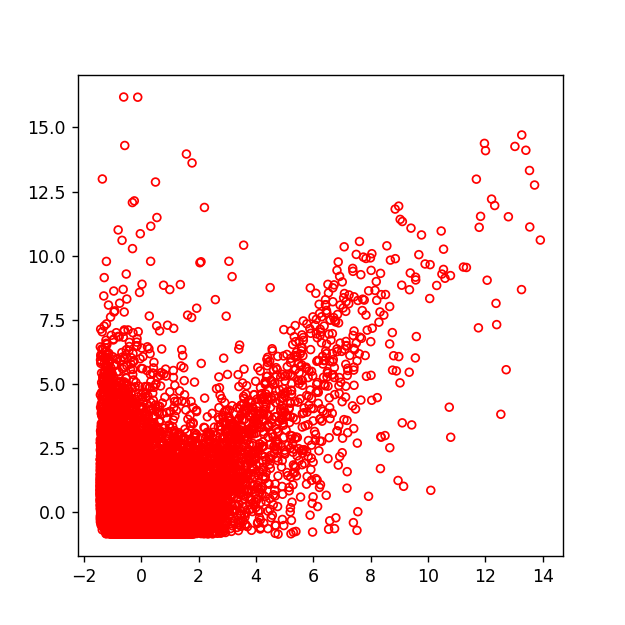

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig2 = plt.figure(figsize=(5,5))
ax1 = fig2.add_subplot((111))#,projection='3d')
ax1.scatter(features[:,0],features[:,1],facecolor='none',edgecolor='r',s=20,)

In [7]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=1)
pca.fit(features)
score=pca.score_samples(features)

<IPython.core.display.Javascript object>


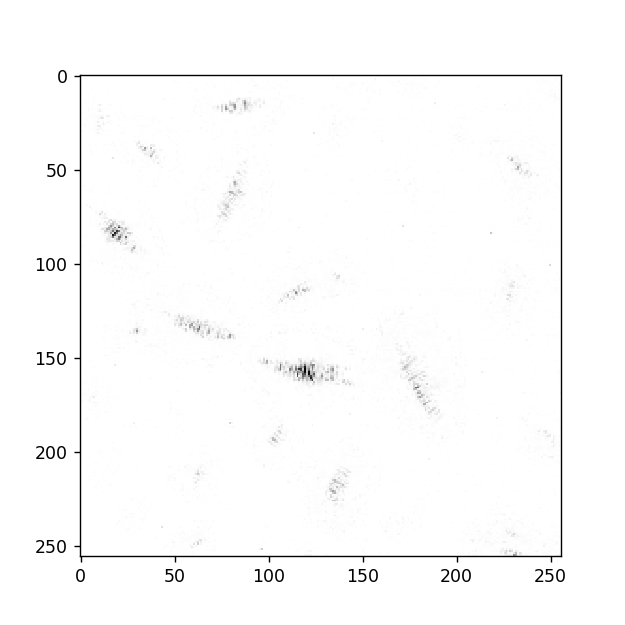

In [8]:
score = score - score.min()
score = (score/score.max())
fig3 = plt.figure(figsize=(5,5))
plt.imshow(np.reshape(score,(256,256)),cmap='gray')

#Final step of thresholding and segmenting

<IPython.core.display.Javascript object>


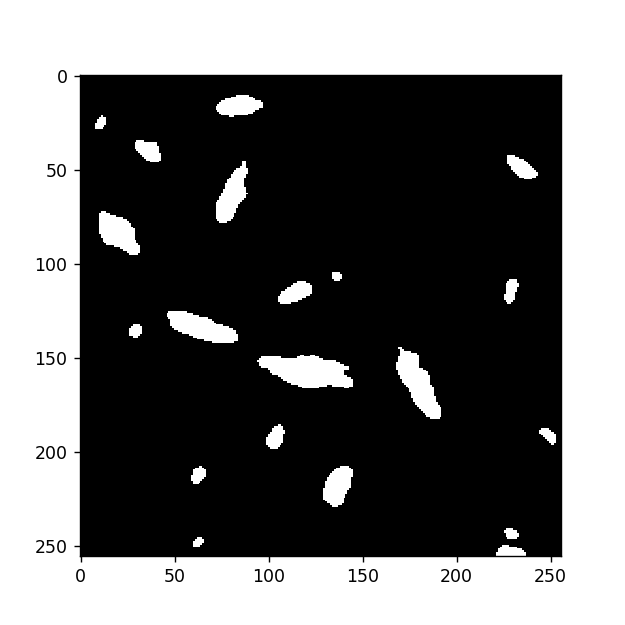

In [9]:
ret, score_thresh=cv2.threshold(np.reshape(score,(256,256)),0.95,1,cv2.THRESH_BINARY_INV)
score_smooth = cv2.GaussianBlur(score_thresh,(11,11),0)
score_smooth = score_smooth - score_smooth.min()
score_smooth = (score_smooth/score_smooth.max())
ret, score_smooth=cv2.threshold(score_smooth,0.1,1,cv2.THRESH_BINARY)
score_smooth=np.uint8(score_smooth)
fig4 = plt.figure(figsize=(5,5))
plt.imshow(score_smooth,cmap='gray')

#ploting the segmenting contours

In [26]:
im2, contours, heirarchy = cv2.findContours(score_smooth,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours)
image = cv2.applyColorMap(np.uint8(imat*255),cv2.COLORMAP_PINK)
cv2.drawContours(image,contours,-1,(255,255,0),1)
cv2.namedWindow('bees',cv2.WINDOW_NORMAL)
cv2.resizeWindow('bees', 600,600)
cv2.imshow('bees',image)
cv2.waitKey()
cv2.destroyAllWindows()